In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

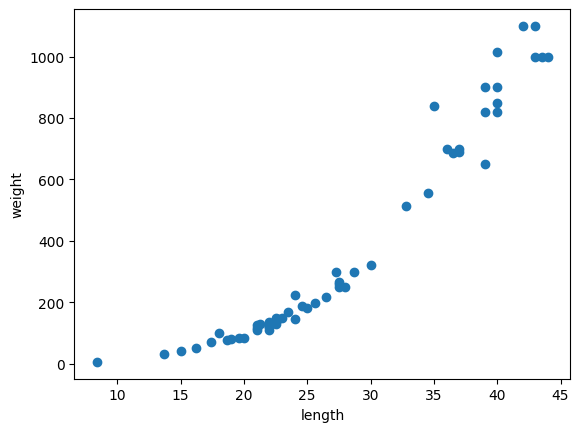

In [4]:
plt.scatter(length,weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
# 모델 
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [15]:
from sklearn.model_selection import train_test_split
# 데이터(전처리) - 훈련 / 테스트
length = length.reshape(-1,1)
weight = weight.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(length,weight,random_state=42)

In [16]:
x_train.shape, y_train.shape

((42, 1), (42, 1))

In [18]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [22]:
knr.score(x_test,y_test)

0.992809406101064

In [21]:
# R^2 결정계수
# 회귀모델에서 모델의 적합도를 나타내는 지표  0 ~ 1 사이를 가짐
# 1 - (타깃-예측)**2 / (타킷 - 평균)**2

In [23]:
# 평균절대제곱오차 - 회귀모델을 평가할때 사용
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,knr.predict(x_test))
mae

19.157142857142862

In [27]:
np.abs(y_test-knr.predict(x_test)).sum() / len(x_test)

19.157142857142862

In [29]:
# 이웃의 개수가 적당해야 한다.
# 모델의 성능을 좌우하는 이수의 개수가 너무 많으면?  --> 너무 과하게 학습 - 미쳤음  과적합  over fit
# 모델의 성능을 좌우하는 이수의 개수가 너무 적으면?  --> 너무 학습을 안함 - 공부를 안함  과소적합  under fit
# 과적합

In [30]:
# 이웃의 개수를 3개로 줄여서 학습 R^2
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
knr.score(x_test,y_test)

0.9746459963987609

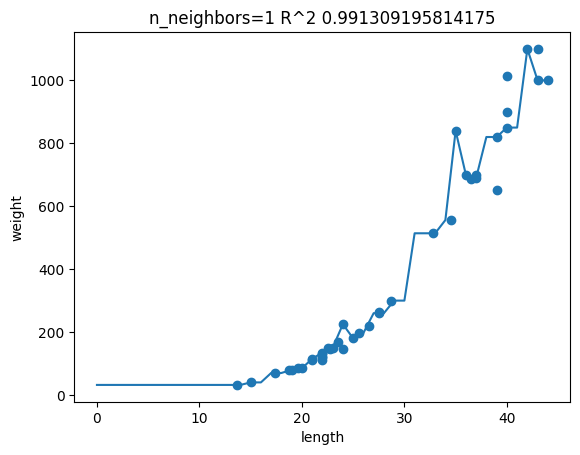

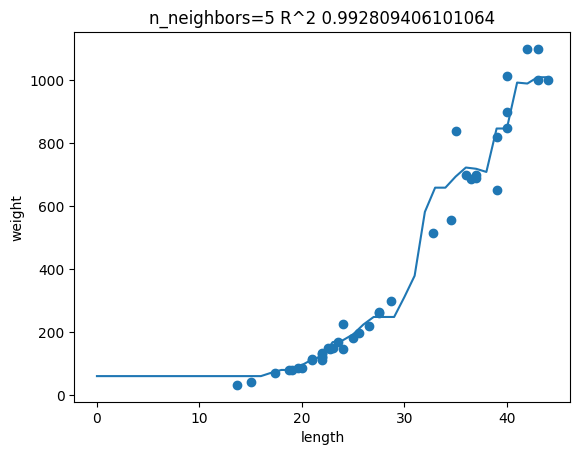

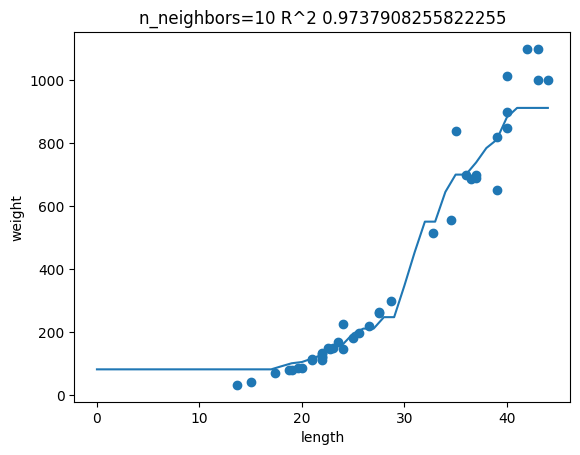

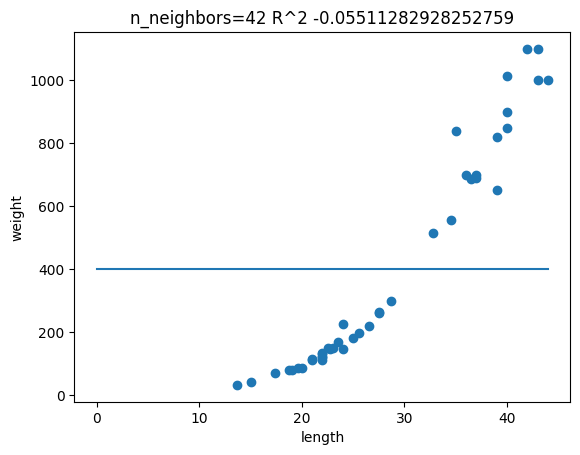

In [35]:
for i in [1,5,10, len(x_train)]:
  knr = KNeighborsRegressor(n_neighbors=i)
  knr.fit(x_train,y_train)
  x = np.arange(45).reshape(-1,1)
  predict = knr.predict( x )
  # 훈련세트와 예측결과를 그려보기
  plt.scatter(x_train,y_train)
  plt.plot(x, predict)
  plt.title(f'n_neighbors={i} R^2 {knr.score(x_test,y_test ) }')
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

In [36]:
# KNeighborsRegressor 모델을 이용해서 예측모델을 만들어 봅시다.
# 보스턴 지역의 집값을 예측
from sklearn.datasets import load_boston

ImportError: ignored